In [1]:
from config import *
from map_wrapper import *

In [2]:
print(f"{year}-{month:02}")

2020-04


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from mpl_toolkits.basemap import Basemap

In [4]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [5]:
conn=db.get_conn()

In [6]:

cities = """
('北京','上海','深圳','杭州','广州','南京','苏州','成都','东莞','西安','武汉','天津','长沙',
'宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨','厦门')
"""
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and city in {cities}", con=conn)


In [7]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [8]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [9]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['平均工资']=salary_mean
    sub_data['最低工资']=salary_95_min
    sub_data['中位数']=salary_median
    sub_data['最高工资']=salary_95_max
    sub_data['招聘人数']=count
    sub_data['百分比']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='平均工资', ascending=False)

    return sub_data

data_format={"百分比":"{:.2%}","平均工资":"{:.0f}","中位数":"{:.0f}","最低工资":"{:.0f}","最高工资":"{:.0f}"}

translate_dict={}


# 程序员工资

In [54]:
data_city=get_sub_stats_by_col(data,'city')
data_city['排名']=list(range(1,data_city.shape[0]+1))
data_city=data_city[['排名', 'city', '平均工资', '最低工资', '中位数', '最高工资', '招聘人数', '百分比']]
data_city.style.format(data_format)

,排名,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
4,1,北京,19268,6500,17500,45000,17560,9.51%
0,2,上海,17415,7000,15000,40000,33597,18.19%
2,3,深圳,17169,6500,15000,37500,26113,14.14%
13,4,杭州,16539,6000,15000,37500,9797,5.30%
9,5,广州,14360,5357,12500,30000,19771,10.70%
1,6,南京,13819,5250,12500,29003,10676,5.78%
3,7,成都,12990,5250,11666,31250,8567,4.64%
17,8,东莞,12990,5000,12500,25000,2030,1.10%
10,9,苏州,12692,5250,12000,27500,5883,3.19%
5,10,大连,12578,4500,10000,35000,6884,3.73%


In [53]:
data_city.columns

Index(['city', '平均工资', '最低工资', '中位数', '最高工资', '招聘人数', '百分比', '排名'], dtype='object')

In [11]:
describe(data_city,'程序员')

2020年4月北京招收程序员17560人。2019年4月北京程序员平均工资19268元，工资中位数17500元，其中95%的人的工资介于6500元到45000元。

2020年4月上海招收程序员33597人。2019年4月上海程序员平均工资17415元，工资中位数15000元，其中95%的人的工资介于7000元到40000元。

2020年4月深圳招收程序员26113人。2019年4月深圳程序员平均工资17169元，工资中位数15000元，其中95%的人的工资介于6500元到37500元。

2020年4月杭州招收程序员9797人。2019年4月杭州程序员平均工资16539元，工资中位数15000元，其中95%的人的工资介于6000元到37500元。

2020年4月广州招收程序员19771人。2019年4月广州程序员平均工资14360元，工资中位数12500元，其中95%的人的工资介于5357元到30000元。

2020年4月南京招收程序员10676人。2019年4月南京程序员平均工资13819元，工资中位数12500元，其中95%的人的工资介于5250元到29003元。

2020年4月成都招收程序员8567人。2019年4月成都程序员平均工资12990元，工资中位数11666元，其中95%的人的工资介于5250元到31250元。

2020年4月东莞招收程序员2030人。2019年4月东莞程序员平均工资12990元，工资中位数12500元，其中95%的人的工资介于5000元到25000元。

2020年4月苏州招收程序员5883人。2019年4月苏州程序员平均工资12692元，工资中位数12000元，其中95%的人的工资介于5250元到27500元。

2020年4月大连招收程序员6884人。2019年4月大连程序员平均工资12578元，工资中位数10000元，其中95%的人的工资介于4500元到35000元。

2020年4月武汉招收程序员8578人。2019年4月武汉程序员平均工资12506元，工资中位数11500元，其中95%的人的工资介于5250元到27500元。

2020年4月西安招收程序员6117人。2019年4月西安程序员平均工资12050元，工资中位数11500元，其中95%的人的工资介于5000元到27500元。

2020年4月长沙招收

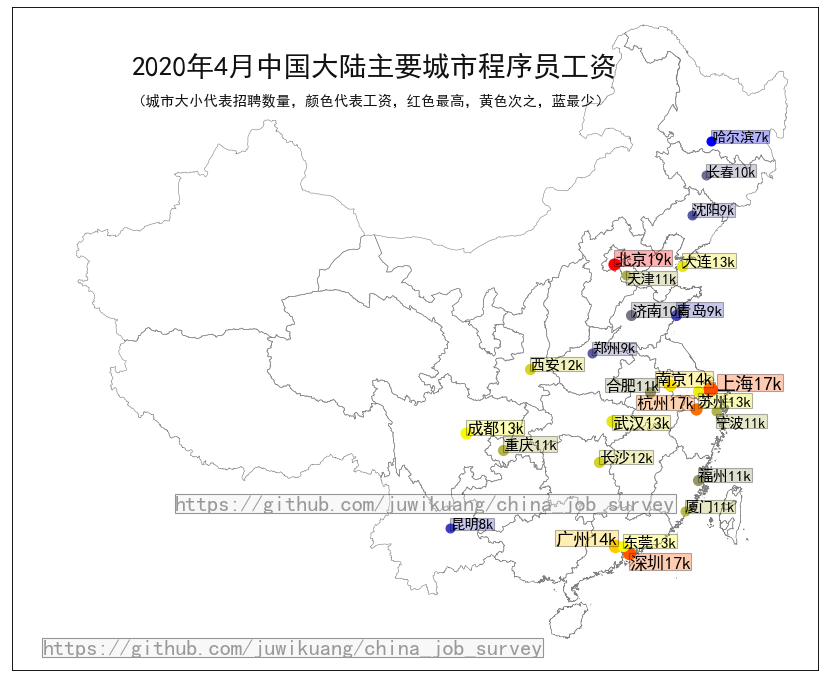

In [12]:
draw_city_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 区块链工程师

In [13]:
data_blockchain=get_sub_stats_by_col(data[(data.expert_blockchain==1)],'city')

data_blockchain.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
10,厦门,32500,32500,32500,32500,1,0.20%
11,大连,30000,30000,30000,30000,1,0.20%
3,上海,27723,12000,30429,37750,74,14.95%
4,北京,24631,11000,21666,60000,71,14.34%
16,南京,24250,11000,24250,37500,2,0.40%
7,郑州,22500,22500,22500,22500,5,1.01%
2,杭州,22292,15000,22500,29833,32,6.46%
12,宁波,20833,20833,20833,20833,1,0.20%
6,深圳,20520,7000,20357,32333,66,13.33%
5,成都,19823,11500,20416,25000,17,3.43%


In [14]:
describe(data_blockchain,'区块链工程师')

2020年4月厦门招收区块链工程师1人。2019年4月厦门区块链工程师平均工资32500元，工资中位数32500元，其中95%的人的工资介于32500元到32500元。

2020年4月大连招收区块链工程师1人。2019年4月大连区块链工程师平均工资30000元，工资中位数30000元，其中95%的人的工资介于30000元到30000元。

2020年4月上海招收区块链工程师74人。2019年4月上海区块链工程师平均工资27723元，工资中位数30429元，其中95%的人的工资介于12000元到37750元。

2020年4月北京招收区块链工程师71人。2019年4月北京区块链工程师平均工资24631元，工资中位数21666元，其中95%的人的工资介于11000元到60000元。

2020年4月南京招收区块链工程师2人。2019年4月南京区块链工程师平均工资24250元，工资中位数24250元，其中95%的人的工资介于11000元到37500元。

2020年4月郑州招收区块链工程师5人。2019年4月郑州区块链工程师平均工资22500元，工资中位数22500元，其中95%的人的工资介于22500元到22500元。

2020年4月杭州招收区块链工程师32人。2019年4月杭州区块链工程师平均工资22292元，工资中位数22500元，其中95%的人的工资介于15000元到29833元。

2020年4月宁波招收区块链工程师1人。2019年4月宁波区块链工程师平均工资20833元，工资中位数20833元，其中95%的人的工资介于20833元到20833元。

2020年4月深圳招收区块链工程师66人。2019年4月深圳区块链工程师平均工资20520元，工资中位数20357元，其中95%的人的工资介于7000元到32333元。

2020年4月成都招收区块链工程师17人。2019年4月成都区块链工程师平均工资19823元，工资中位数20416元，其中95%的人的工资介于11500元到25000元。

2020年4月广州招收区块链工程师193人。2019年4月广州区块链工程师平均工资17337元，工资中位数15000元，其中95%的人的工资介于6000元到30000元。

2020年4月济南招收区块链工程师1人。2019年4月济南区块链工程师平均工资14000元，工资中

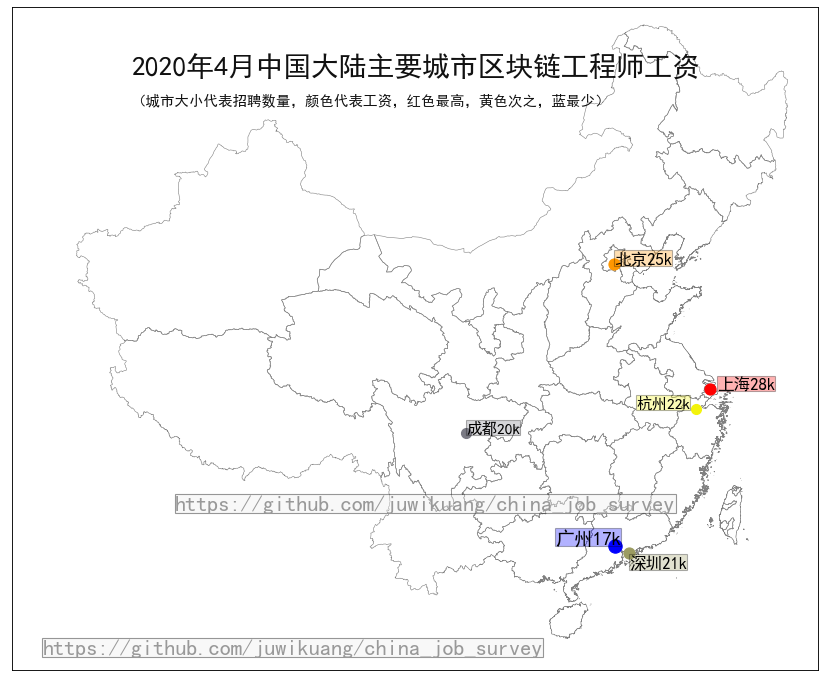

In [15]:
draw_city_map(data_blockchain[data_blockchain['招聘人数']>10],10,f'{year}年{month}月中国大陆主要城市区块链工程师工资')

# 机器学习工程师

In [16]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='机器学习'],'city')
data_city_algorithm.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
0,北京,26669,7059,25000,52187,717,21.89%
1,上海,26521,7000,25000,58741,811,24.76%
7,杭州,25558,10008,22500,62107,181,5.53%
3,深圳,22964,5155,22500,54708,481,14.68%
12,厦门,21627,13000,22167,25000,17,0.52%
4,广州,20597,9000,17500,40542,367,11.20%
19,郑州,18778,6500,20000,22500,18,0.55%
2,成都,18042,10431,12500,41253,103,3.14%
11,南京,17491,8208,17500,37500,204,6.23%
9,西安,16398,9000,15000,39500,48,1.47%


In [17]:
describe(data_city_algorithm,'机器学习')

2020年4月北京招收机器学习717人。2019年4月北京机器学习平均工资26669元，工资中位数25000元，其中95%的人的工资介于7059元到52187元。

2020年4月上海招收机器学习811人。2019年4月上海机器学习平均工资26521元，工资中位数25000元，其中95%的人的工资介于7000元到58741元。

2020年4月杭州招收机器学习181人。2019年4月杭州机器学习平均工资25558元，工资中位数22500元，其中95%的人的工资介于10008元到62107元。

2020年4月深圳招收机器学习481人。2019年4月深圳机器学习平均工资22964元，工资中位数22500元，其中95%的人的工资介于5155元到54708元。

2020年4月厦门招收机器学习17人。2019年4月厦门机器学习平均工资21627元，工资中位数22167元，其中95%的人的工资介于13000元到25000元。

2020年4月广州招收机器学习367人。2019年4月广州机器学习平均工资20597元，工资中位数17500元，其中95%的人的工资介于9000元到40542元。

2020年4月郑州招收机器学习18人。2019年4月郑州机器学习平均工资18778元，工资中位数20000元，其中95%的人的工资介于6500元到22500元。

2020年4月成都招收机器学习103人。2019年4月成都机器学习平均工资18042元，工资中位数12500元，其中95%的人的工资介于10431元到41253元。

2020年4月南京招收机器学习204人。2019年4月南京机器学习平均工资17491元，工资中位数17500元，其中95%的人的工资介于8208元到37500元。

2020年4月西安招收机器学习48人。2019年4月西安机器学习平均工资16398元，工资中位数15000元，其中95%的人的工资介于9000元到39500元。

2020年4月合肥招收机器学习20人。2019年4月合肥机器学习平均工资16275元，工资中位数14714元，其中95%的人的工资介于9000元到45000元。

2020年4月哈尔滨招收机器学习5人。2019年4月哈尔滨机器学习平均工资16000元，工资中位数16000元，其中95%的人的工资介于16000元到16000元。

2020

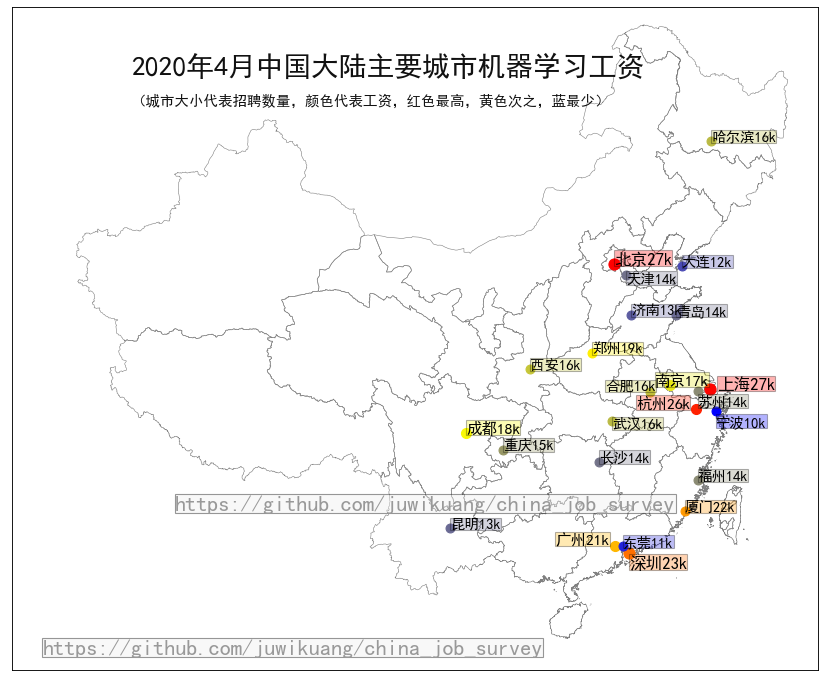

In [18]:
draw_city_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市机器学习工资')

# 系统架构师

In [19]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'city')
data_city_architect.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
4,北京,30769,12500,30000,55000,1258,15.91%
9,深圳,27176,7500,26833,52500,1135,14.35%
6,杭州,27162,6943,27500,45000,464,5.87%
3,上海,25239,7000,22500,54166,1730,21.88%
1,南京,21813,8817,21500,35000,318,4.02%
2,广州,21362,6000,20712,44054,1106,13.99%
7,成都,19047,3825,17500,45537,224,2.83%
10,苏州,17737,4814,15000,37375,182,2.30%
11,武汉,17608,7000,17500,32500,283,3.58%
18,厦门,17230,8500,15278,30875,42,0.53%


In [20]:
describe(data_city_architect,'系统架构师')

2020年4月北京招收系统架构师1258人。2019年4月北京系统架构师平均工资30769元，工资中位数30000元，其中95%的人的工资介于12500元到55000元。

2020年4月深圳招收系统架构师1135人。2019年4月深圳系统架构师平均工资27176元，工资中位数26833元，其中95%的人的工资介于7500元到52500元。

2020年4月杭州招收系统架构师464人。2019年4月杭州系统架构师平均工资27162元，工资中位数27500元，其中95%的人的工资介于6943元到45000元。

2020年4月上海招收系统架构师1730人。2019年4月上海系统架构师平均工资25239元，工资中位数22500元，其中95%的人的工资介于7000元到54166元。

2020年4月南京招收系统架构师318人。2019年4月南京系统架构师平均工资21813元，工资中位数21500元，其中95%的人的工资介于8817元到35000元。

2020年4月广州招收系统架构师1106人。2019年4月广州系统架构师平均工资21362元，工资中位数20712元，其中95%的人的工资介于6000元到44054元。

2020年4月成都招收系统架构师224人。2019年4月成都系统架构师平均工资19047元，工资中位数17500元，其中95%的人的工资介于3825元到45537元。

2020年4月苏州招收系统架构师182人。2019年4月苏州系统架构师平均工资17737元，工资中位数15000元，其中95%的人的工资介于4814元到37375元。

2020年4月武汉招收系统架构师283人。2019年4月武汉系统架构师平均工资17608元，工资中位数17500元，其中95%的人的工资介于7000元到32500元。

2020年4月厦门招收系统架构师42人。2019年4月厦门系统架构师平均工资17230元，工资中位数15278元，其中95%的人的工资介于8500元到30875元。

2020年4月长沙招收系统架构师149人。2019年4月长沙系统架构师平均工资17187元，工资中位数17500元，其中95%的人的工资介于9000元到34438元。

2020年4月西安招收系统架构师267人。2019年4月西安系统架构师平均工资16778元，工资中位数16000元，其中9

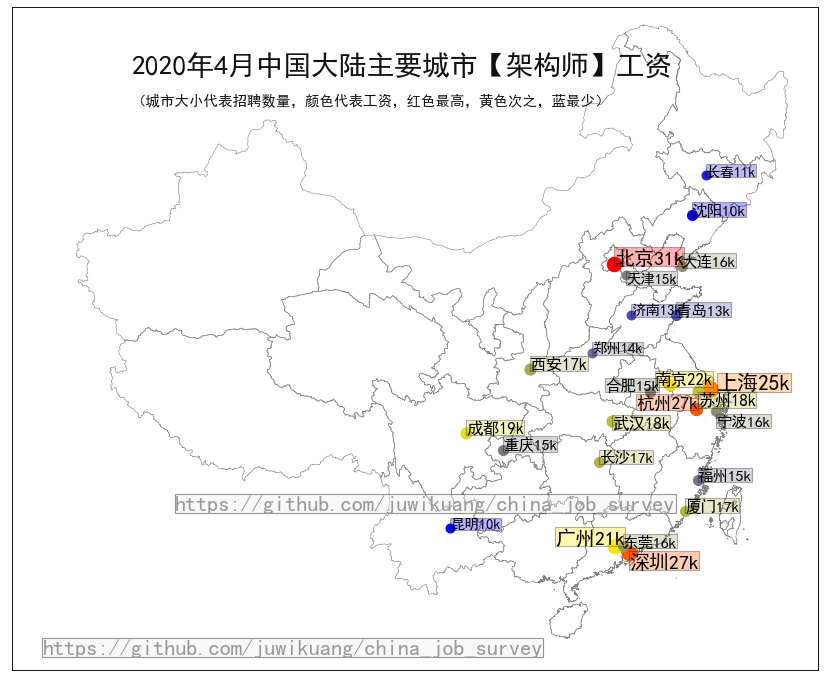

In [21]:
draw_city_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [22]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'city')
data_bio.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,宁波,16000,16000,16000,16000,1,3.23%
4,北京,15000,15000,15000,15000,5,16.13%
7,长沙,13750,12500,12500,17500,4,12.90%
2,苏州,12500,12500,12500,12500,1,3.23%
6,天津,12500,12500,12500,12500,1,3.23%
3,杭州,11500,11500,11500,11500,1,3.23%
1,广州,11375,7000,11375,14000,8,25.81%
0,上海,9000,7000,8000,12500,7,22.58%
8,南京,9000,9000,9000,9000,3,9.68%


In [23]:
describe(data_bio,'生物信息工程师')

2020年4月宁波招收生物信息工程师1人。2019年4月宁波生物信息工程师平均工资16000元，工资中位数16000元，其中95%的人的工资介于16000元到16000元。

2020年4月北京招收生物信息工程师5人。2019年4月北京生物信息工程师平均工资15000元，工资中位数15000元，其中95%的人的工资介于15000元到15000元。

2020年4月长沙招收生物信息工程师4人。2019年4月长沙生物信息工程师平均工资13750元，工资中位数12500元，其中95%的人的工资介于12500元到17500元。

2020年4月苏州招收生物信息工程师1人。2019年4月苏州生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年4月天津招收生物信息工程师1人。2019年4月天津生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年4月杭州招收生物信息工程师1人。2019年4月杭州生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2020年4月广州招收生物信息工程师8人。2019年4月广州生物信息工程师平均工资11375元，工资中位数11375元，其中95%的人的工资介于7000元到14000元。

2020年4月上海招收生物信息工程师7人。2019年4月上海生物信息工程师平均工资9000元，工资中位数8000元，其中95%的人的工资介于7000元到12500元。

2020年4月南京招收生物信息工程师3人。2019年4月南京生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。



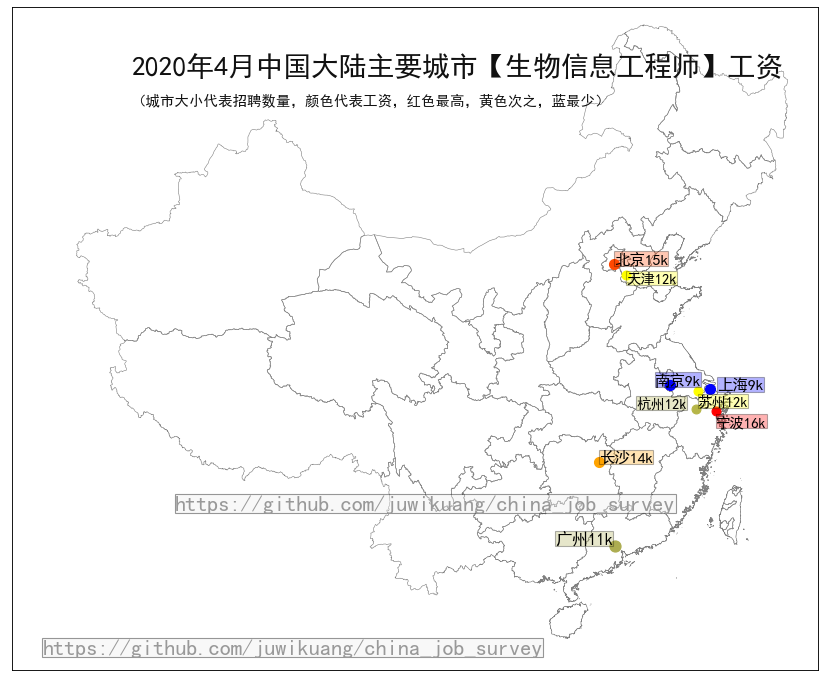

In [24]:
draw_city_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [25]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'city')
data_spider=data_spider[data_spider['招聘人数']>10]
data_spider.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
9,南京,15816,11500,15000,20000,19,7.34%
8,上海,14969,3750,14000,33500,32,12.36%
6,北京,14583,7500,15000,20000,36,13.90%
2,广州,13981,6044,14167,20500,27,10.42%
1,深圳,13858,9000,12500,22500,53,20.46%
0,武汉,12375,8500,11500,20000,12,4.63%
3,长沙,9000,7000,7800,12500,14,5.41%
7,成都,7620,6010,6850,11500,25,9.65%


In [26]:
describe(data_spider, '爬虫工程师')

2020年4月南京招收爬虫工程师19人。2019年4月南京爬虫工程师平均工资15816元，工资中位数15000元，其中95%的人的工资介于11500元到20000元。

2020年4月上海招收爬虫工程师32人。2019年4月上海爬虫工程师平均工资14969元，工资中位数14000元，其中95%的人的工资介于3750元到33500元。

2020年4月北京招收爬虫工程师36人。2019年4月北京爬虫工程师平均工资14583元，工资中位数15000元，其中95%的人的工资介于7500元到20000元。

2020年4月广州招收爬虫工程师27人。2019年4月广州爬虫工程师平均工资13981元，工资中位数14167元，其中95%的人的工资介于6044元到20500元。

2020年4月深圳招收爬虫工程师53人。2019年4月深圳爬虫工程师平均工资13858元，工资中位数12500元，其中95%的人的工资介于9000元到22500元。

2020年4月武汉招收爬虫工程师12人。2019年4月武汉爬虫工程师平均工资12375元，工资中位数11500元，其中95%的人的工资介于8500元到20000元。

2020年4月长沙招收爬虫工程师14人。2019年4月长沙爬虫工程师平均工资9000元，工资中位数7800元，其中95%的人的工资介于7000元到12500元。

2020年4月成都招收爬虫工程师25人。2019年4月成都爬虫工程师平均工资7620元，工资中位数6850元，其中95%的人的工资介于6010元到11500元。



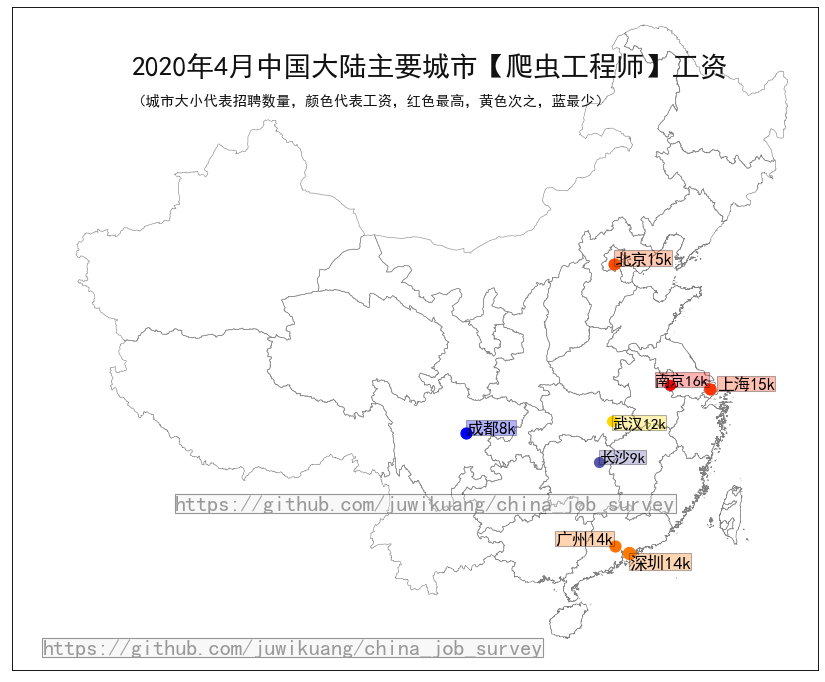

In [27]:
draw_city_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [28]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
3,北京,18035,7000,15000,42712,7910,9.67%
1,深圳,17336,7000,15000,40000,9758,11.93%
4,上海,17323,7000,15500,37500,14429,17.64%
10,杭州,16263,6554,14500,40000,4616,5.64%
6,广州,14498,6000,12500,30000,9926,12.13%
0,南京,13599,5250,12500,27500,5450,6.66%
7,大连,13497,4624,11000,35000,3718,4.55%
17,东莞,12645,5250,12500,23178,543,0.66%
2,成都,12406,4912,11500,27500,3232,3.95%
5,武汉,12146,5250,11000,26000,3395,4.15%


In [29]:
describe(data_java, 'Java程序员')

2020年4月北京招收Java程序员7910人。2019年4月北京Java程序员平均工资18035元，工资中位数15000元，其中95%的人的工资介于7000元到42712元。

2020年4月深圳招收Java程序员9758人。2019年4月深圳Java程序员平均工资17336元，工资中位数15000元，其中95%的人的工资介于7000元到40000元。

2020年4月上海招收Java程序员14429人。2019年4月上海Java程序员平均工资17323元，工资中位数15500元，其中95%的人的工资介于7000元到37500元。

2020年4月杭州招收Java程序员4616人。2019年4月杭州Java程序员平均工资16263元，工资中位数14500元，其中95%的人的工资介于6554元到40000元。

2020年4月广州招收Java程序员9926人。2019年4月广州Java程序员平均工资14498元，工资中位数12500元，其中95%的人的工资介于6000元到30000元。

2020年4月南京招收Java程序员5450人。2019年4月南京Java程序员平均工资13599元，工资中位数12500元，其中95%的人的工资介于5250元到27500元。

2020年4月大连招收Java程序员3718人。2019年4月大连Java程序员平均工资13497元，工资中位数11000元，其中95%的人的工资介于4624元到35000元。

2020年4月东莞招收Java程序员543人。2019年4月东莞Java程序员平均工资12645元，工资中位数12500元，其中95%的人的工资介于5250元到23178元。

2020年4月成都招收Java程序员3232人。2019年4月成都Java程序员平均工资12406元，工资中位数11500元，其中95%的人的工资介于4912元到27500元。

2020年4月武汉招收Java程序员3395人。2019年4月武汉Java程序员平均工资12146元，工资中位数11000元，其中95%的人的工资介于5250元到26000元。

2020年4月苏州招收Java程序员1923人。2019年4月苏州Java程序员平均工资12127元，工资中位数11500元，其中95%的人的工资介于5000元到25000元。

2020年4月西安招

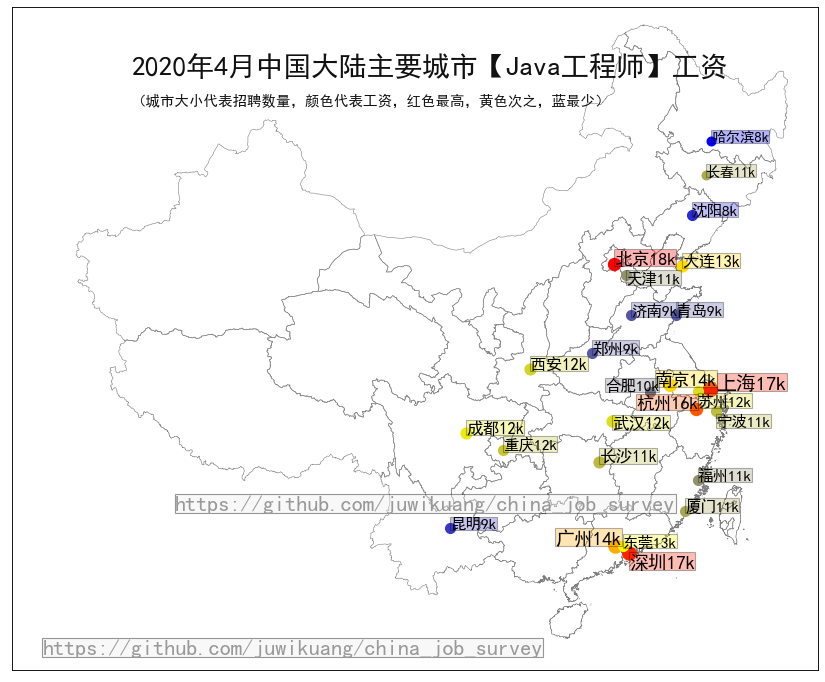

In [30]:
draw_city_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

# Python程序员

In [31]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'city')

data_python.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
9,北京,25054,9000,22500,45000,3686,15.66%
0,上海,21928,7000,20000,45000,4984,21.17%
2,深圳,21713,7000,19000,48520,2854,12.13%
13,杭州,21229,7998,19000,45000,1376,5.85%
8,重庆,18297,5250,12333,42500,299,1.27%
14,广州,17742,6500,15433,42615,2553,10.85%
6,厦门,17068,7300,15000,30167,76,0.32%
4,成都,16210,5870,14500,37108,1048,4.45%
10,西安,15262,6000,14583,35000,774,3.29%
5,武汉,15261,5897,12500,38674,749,3.18%


In [32]:
describe(data_python, 'Python程序员')

2020年4月北京招收Python程序员3686人。2019年4月北京Python程序员平均工资25054元，工资中位数22500元，其中95%的人的工资介于9000元到45000元。

2020年4月上海招收Python程序员4984人。2019年4月上海Python程序员平均工资21928元，工资中位数20000元，其中95%的人的工资介于7000元到45000元。

2020年4月深圳招收Python程序员2854人。2019年4月深圳Python程序员平均工资21713元，工资中位数19000元，其中95%的人的工资介于7000元到48520元。

2020年4月杭州招收Python程序员1376人。2019年4月杭州Python程序员平均工资21229元，工资中位数19000元，其中95%的人的工资介于7998元到45000元。

2020年4月重庆招收Python程序员299人。2019年4月重庆Python程序员平均工资18297元，工资中位数12333元，其中95%的人的工资介于5250元到42500元。

2020年4月广州招收Python程序员2553人。2019年4月广州Python程序员平均工资17742元，工资中位数15433元，其中95%的人的工资介于6500元到42615元。

2020年4月厦门招收Python程序员76人。2019年4月厦门Python程序员平均工资17068元，工资中位数15000元，其中95%的人的工资介于7300元到30167元。

2020年4月成都招收Python程序员1048人。2019年4月成都Python程序员平均工资16210元，工资中位数14500元，其中95%的人的工资介于5870元到37108元。

2020年4月西安招收Python程序员774人。2019年4月西安Python程序员平均工资15262元，工资中位数14583元，其中95%的人的工资介于6000元到35000元。

2020年4月武汉招收Python程序员749人。2019年4月武汉Python程序员平均工资15261元，工资中位数12500元，其中95%的人的工资介于5897元到38674元。

2020年4月南京招收Python程序员1609人。2019年4月南京Python程序员平均工资14957元，工资中位数14000

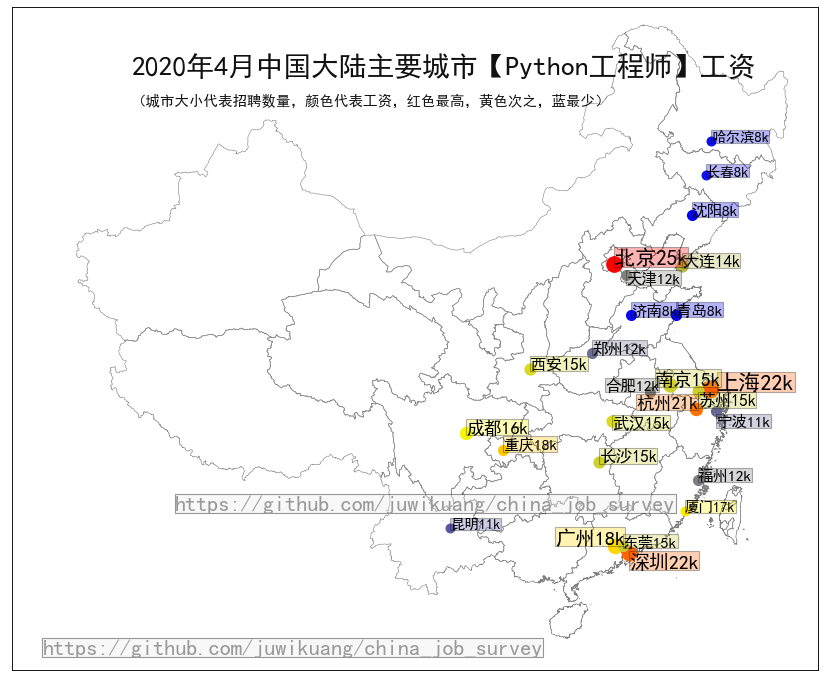

In [33]:
draw_city_map(data_python, 100,  f'{year}年{month}月中国大陆主要城市【Python工程师】工资')

In [43]:
history_data = pd.read_sql(sql='select * from CityStats', con=conn)

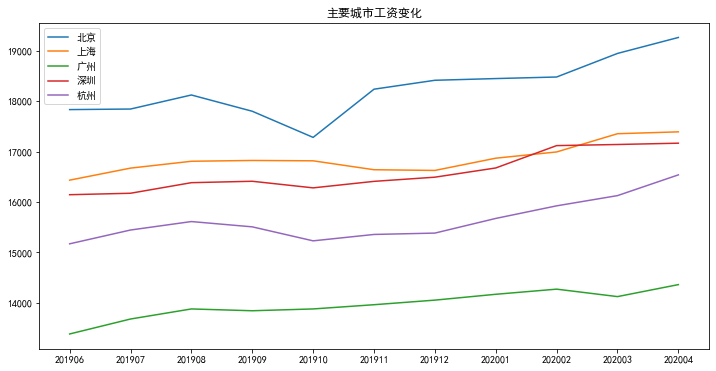

In [48]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(12,6))
cities = set(history_data.City)
cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    plt.plot("Month","Salary",data=history_data[history_data.City==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend()
plt.show()

No handles with labels found to put in legend.


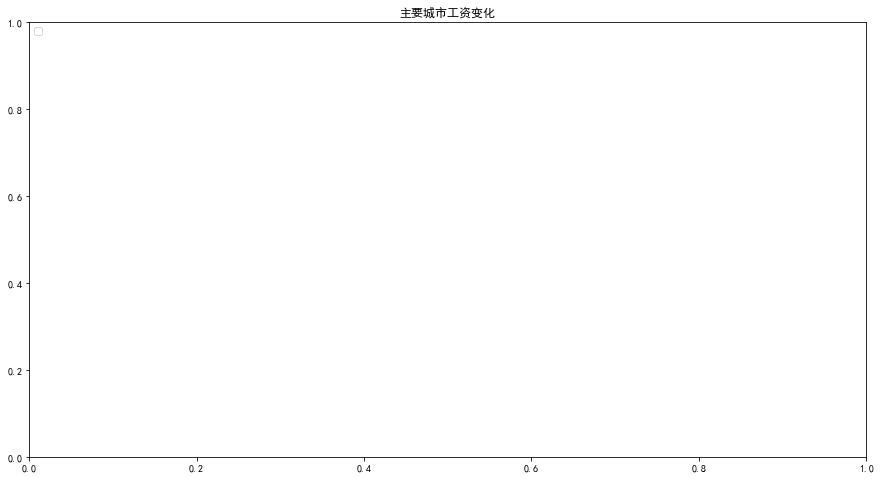

In [45]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(15,8))
cities = set(history_data.City)
#cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    values=history_data[history_data.City==city]['Salary'].values
    if abs(values[-1]-values[-2])>1000:
        plt.plot("Month","Salary",data=history_data[history_data.City==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend( loc='upper left')
plt.show()

In [46]:
values=history_data[history_data.City==city]['Salary'].values